In [1]:
! pip install pandas numpy matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("NY-House-Dataset.csv")



In [ ]:
df = df.dropna(subset=["PRICE", "PROPERTYSQFT"])

# Create scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df["PROPERTYSQFT"], df["PRICE"])

plt.xlabel("Property Size (sqft)")
plt.ylabel("Price (USD)")
plt.title("NY Housing Prices vs. Property Size")
plt.grid(True)

plt.show()

/var/folders/w4/t00w3f8d0l7d5x_yj66ms69h0000gn/T/ipykernel_45628/769091279.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(


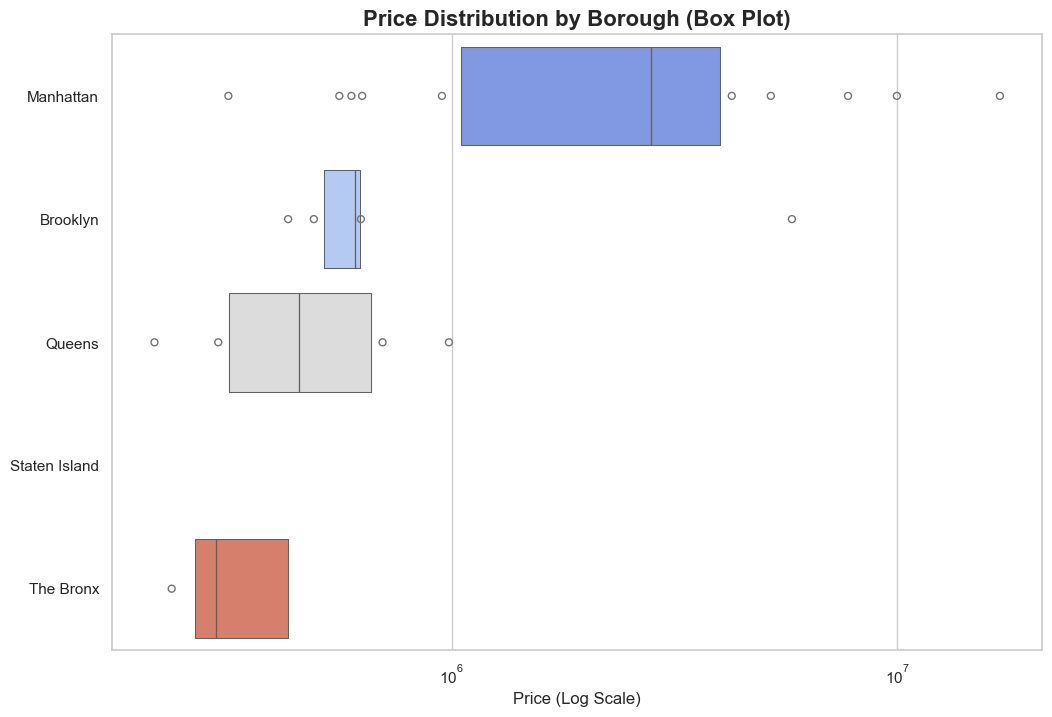

In [4]:
#ANALYSIS PLOTS FROM HERE
#1 PLOT FOR THE HOUSE PRICES ( BOX PLOT - HARSHVARDHAN )
areas = {
    'New York County': 'Manhattan',
    'Kings County': 'Brooklyn',
    'Queens County': 'Queens',
    'Bronx County': 'The Bronx',
    'Richmond County': 'Staten Island'
}

df_clean = df[df['ADMINISTRATIVE_AREA_LEVEL_2'].isin(areas.keys())].copy()
df_clean['Borough'] = df_clean['ADMINISTRATIVE_AREA_LEVEL_2'].map(areas)
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

sns.boxenplot(
    data=df_clean, 
    x="PRICE", 
    y="Borough", 
    palette="coolwarm", 
    order=['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'The Bronx']
)
plt.xscale('log')

plt.title('Price Distribution by Borough (Box Plot)', fontsize=16, fontweight='bold')
plt.xlabel('Price (Log Scale)')
plt.ylabel('')
plt.show()


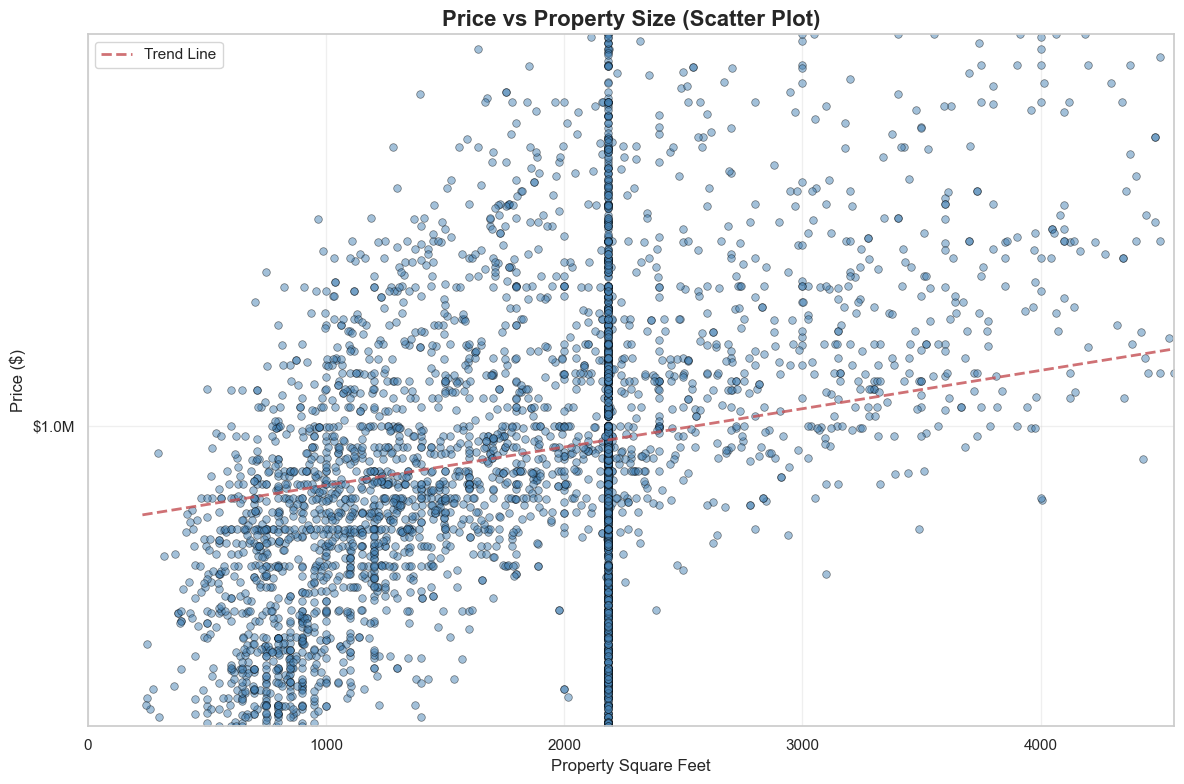

In [5]:
#2 Scatter Plot ( AKHIL )

# Clean PRICE and PROPERTYSQFT columns
df_plot = df.copy()

# Clean PRICE if needed
if df_plot["PRICE"].dtype == "object":
    df_plot["PRICE"] = (
        df_plot["PRICE"]
        .astype(str)
        .str.replace("$", "", regex=False)
        .str.replace(",", "", regex=False)
        .str.strip()
    )
df_plot["PRICE"] = pd.to_numeric(df_plot["PRICE"], errors="coerce")

# Clean PROPERTYSQFT if needed
if df_plot["PROPERTYSQFT"].dtype == "object":
    df_plot["PROPERTYSQFT"] = (
        df_plot["PROPERTYSQFT"]
        .astype(str)
        .str.replace(",", "", regex=False)
        .str.strip()
    )
df_plot["PROPERTYSQFT"] = pd.to_numeric(df_plot["PROPERTYSQFT"], errors="coerce")

# Remove rows with missing values
df_scatter = df_plot.dropna(subset=["PRICE", "PROPERTYSQFT"])

# Create scatter plot
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

# Create scatter plot with transparency for better visualization
plt.scatter(df_scatter["PROPERTYSQFT"], df_scatter["PRICE"], 
            alpha=0.5, s=30, c='steelblue', edgecolors='black', linewidth=0.5)

plt.xlabel('Property Square Feet', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.title('Price vs Property Size (Scatter Plot)', fontsize=16, fontweight='bold')
plt.yscale('log')  # Log scale for price to better visualize the distribution
# Scale down x-axis to focus on main data (95th percentile to exclude extreme outliers)
x_max = df_scatter["PROPERTYSQFT"].quantile(0.95)
plt.xlim(0, x_max)
# Scale down y-axis to focus on main data (95th percentile to exclude extreme outliers)
y_max = df_scatter["PRICE"].quantile(0.95)
y_min = df_scatter["PRICE"].quantile(0.05)
plt.ylim(y_min, y_max)

# Format y-axis to show actual numbers instead of scientific notation
from matplotlib.ticker import FuncFormatter, LogLocator
ax = plt.gca()
# Create formatter to show numbers with commas
def format_price(x, pos):
    if x >= 1000000:
        return f'${x/1000000:.1f}M'
    elif x >= 1000:
        return f'${x/1000:.0f}K'
    else:
        return f'${x:.0f}'

# Set more ticks on log scale
ax.yaxis.set_major_locator(LogLocator(base=10, numticks=15))
ax.yaxis.set_minor_locator(LogLocator(base=10, subs=np.arange(2, 10) * 0.1, numticks=100))
ax.yaxis.set_major_formatter(FuncFormatter(format_price))

plt.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(df_scatter["PROPERTYSQFT"], np.log10(df_scatter["PRICE"]), 1)
p = np.poly1d(z)
plt.plot(df_scatter["PROPERTYSQFT"].sort_values(), 
         10**p(df_scatter["PROPERTYSQFT"].sort_values()), 
         "r--", alpha=0.8, linewidth=2, label='Trend Line')
plt.legend()

plt.tight_layout()
plt.show()

In [6]:
#3 BOX PLOT 2

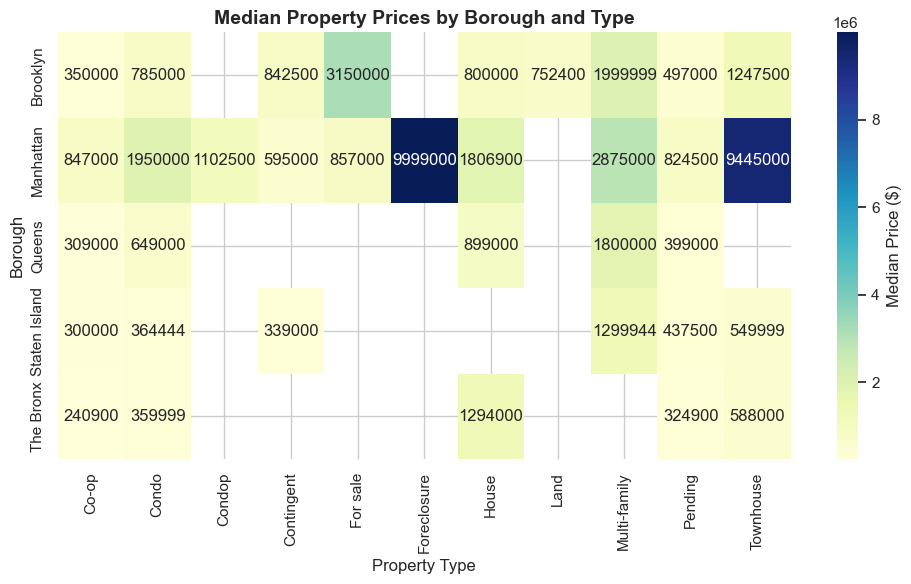

In [7]:
#4 CORELATION PLOT (KAVISH)
areas = {
    'New York County': 'Manhattan',
    'Kings County': 'Brooklyn',
    'Queens County': 'Queens',
    'Bronx County': 'The Bronx',
    'Richmond County': 'Staten Island'
}

df_clean = df[df['LOCALITY'].isin(areas.keys())].copy()
df_clean['Borough'] = df_clean['LOCALITY'].map(areas)

df_clean['TYPE'] = df_clean['TYPE'].str.strip()
df_clean['TYPE'] = df_clean['TYPE'].str.replace(' for sale', '', regex=False)
df_clean['TYPE'] = df_clean['TYPE'].str.replace('Multi-family home', 'Multi-family', regex=False)

heatmap_data = df_clean.pivot_table(index='Borough', columns='TYPE', values='PRICE', aggfunc='median')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlGnBu', cbar_kws={'label': 'Median Price ($)'})
plt.title('Median Property Prices by Borough and Type', fontsize=14, fontweight='bold')
plt.xlabel('Property Type')
plt.ylabel('Borough')
plt.tight_layout()
plt.show()


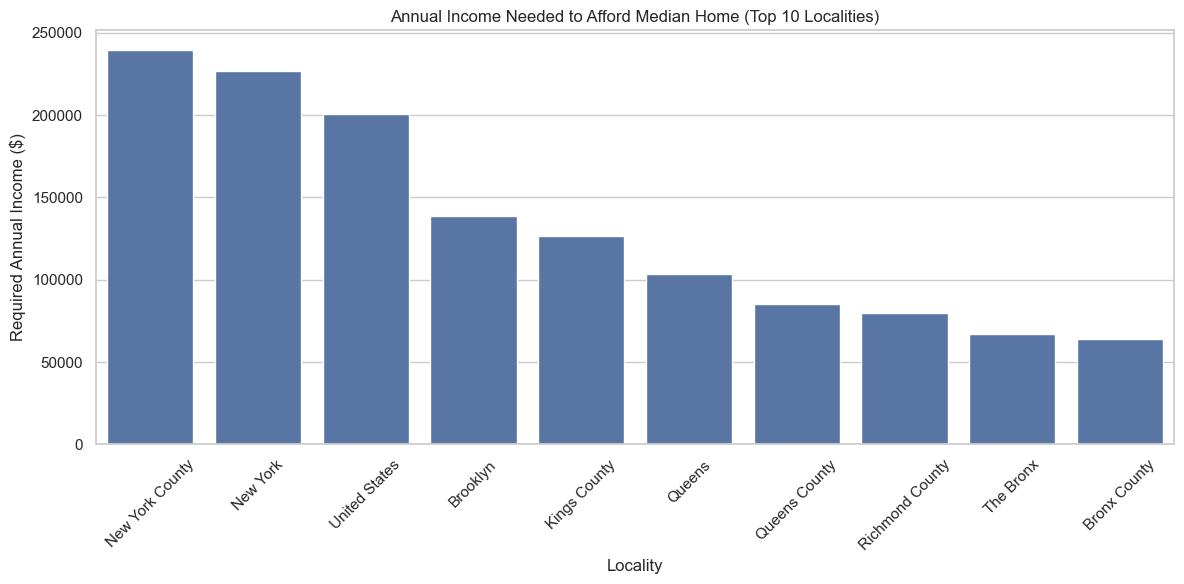


Required Annual Income Only:

0     63846.229166
1    138458.953568
2    126369.456799
3    226963.194070
4    239508.898265
5    103330.981823
6     85538.892237
7     79836.299422
8     67290.595227
9    200731.267117
Name: RequiredAnnualIncome, dtype: float64


In [8]:

#5 REQUIRED INCOME
# Clean PRICE column (remove commas, $, text)
if df["PRICE"].dtype == "object":
    df["PRICE"] = (
        df["PRICE"]
        .astype(str)
        .str.replace("$", "", regex=False)
        .str.replace(",", "", regex=False)
        .str.strip()
    )
df["PRICE"] = pd.to_numeric(df["PRICE"], errors="coerce")

df = df.dropna(subset=["PRICE", "LOCALITY"])


top_localities = df["LOCALITY"].value_counts().head(10).index
df_loc_top = df[df["LOCALITY"].isin(top_localities)]

interest_rate = 0.07       
loan_term = 30           
down_payment = 0.20      
max_ratio = 0.28         

monthly_rate = interest_rate / 12
n_payments = loan_term * 12

afford_data = []

for locality, group in df_loc_top.groupby("LOCALITY"):
    median_price = group["PRICE"].median()
    if pd.isna(median_price):
        continue

    loan_amount = median_price * (1 - down_payment)

    mortgage_payment = loan_amount * (
        (monthly_rate * (1 + monthly_rate) ** n_payments) /
        ((1 + monthly_rate) ** n_payments - 1)
    )

    required_annual_income = (mortgage_payment / max_ratio) * 12

    afford_data.append({
        "LOCALITY": locality,
        "MedianPrice": median_price,
        "RequiredAnnualIncome": required_annual_income
    })

aff_df = pd.DataFrame(afford_data)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=aff_df.sort_values("RequiredAnnualIncome", ascending=False),
    x="LOCALITY",
    y="RequiredAnnualIncome"
)
plt.title("Annual Income Needed to Afford Median Home (Top 10 Localities)")
plt.xlabel("Locality")
plt.ylabel("Required Annual Income ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nRequired Annual Income Only:\n")
print(aff_df["RequiredAnnualIncome"])